<a href="https://colab.research.google.com/github/roseberr/data-analysis/blob/master/keggle/bus_information_system/bus_information_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sn
from sklearn.metrics import confusion_matrix
import torch
import torchvision
import torchtext
from sklearn.preprocessing import LabelEncoder # 라벨 인코더

In [0]:
#drive.mount('/content/gdrive')

In [0]:
#submission=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/데이터분석 /bus_ridetime_dacon/12회 대회/submission_제출양식.csv')
submission=pd.read_csv('/content/submission_제출양식.csv')

submission

,id,next_arrive_time
0,210457,0
1,210458,0
2,210459,0
3,210460,0
4,210461,0
...,...,...
91769,302350,0
91770,302351,0
91771,302352,0
91772,302353,0


In [0]:
#train=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/데이터분석 /bus_ridetime_dacon/12회 대회/train.csv')
train=pd.read_csv('/content/train.csv')

train.head(5)

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64


In [0]:
#test=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/데이터분석 /bus_ridetime_dacon/12회 대회/test.csv')
test=pd.read_csv('/content/test.csv')

test

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91769,302350,2019-11-05,405328102,7983486,281-2,33.493625,126.534764,제주지방법원(광양방면),20시,272.0,고산동산(광양방면),33.495540,126.532907
91770,302351,2019-11-05,405328102,7983486,281-2,33.495540,126.532907,고산동산(광양방면),20시,447.0,제주시청(광양방면),33.498925,126.530351
91771,302352,2019-11-05,405328102,7983486,281-2,33.498925,126.530351,제주시청(광양방면),20시,418.0,광양사거리,33.500473,126.527103
91772,302353,2019-11-05,405328102,7983486,281-2,33.500473,126.527103,광양사거리,20시,140.0,탐라장애인 종합복지관,33.500228,126.525625


In [0]:
test.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355


정류장명 인코딩 한글로 되어있기에 숫자로 바꿔준다


In [0]:
station_encoder = LabelEncoder() # 인코더 생성
_station = list(train['now_station'].values) + list(train['next_station'].values)+list(test['now_station'].values) + list(test['next_station'].values)


 # train_data 의 모든 정류장 이름
station_set = set(_station)

station_encoder.fit(list(station_set)) # 인코딩

# 모든 학습, 시험 데이터의 정류장 정보 치환
train['now_station'] = station_encoder.transform(train['now_station'])
train['next_station'] = station_encoder.transform(train['next_station'])
test['now_station'] = station_encoder.transform(test['now_station'])
test['next_station'] = station_encoder.transform(test['next_station'])
test.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,227,07시,333.0,228,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,228,07시,415.0,235,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,323,08시,417.0,59,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,59,08시,334.0,183,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,183,08시,550.0,285,33.482077,126.485355


now_arrivetime 분포확인

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


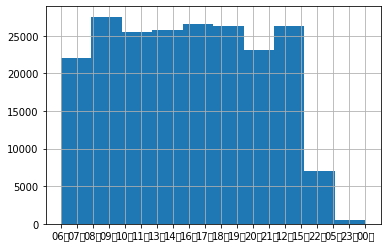

In [0]:
train['now_arrive_time'] .hist()

next_arrive_time 분포확인


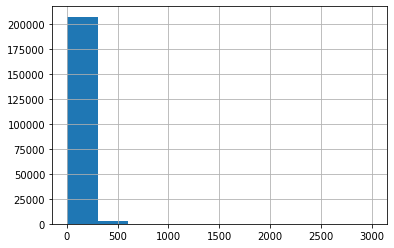

In [0]:
train['next_arrive_time'].hist()

신호시간 영향 분석

변동계수(coefficient of variation): 표준편차/평균



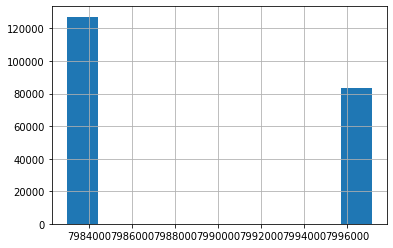

In [0]:
train['vh_id'].hist() #7997025번 버스 번호가 많음

In [0]:
# _station = list(train['now_station'].values) + list(train['next_station'].values) # train_data 의 모든 정류장 이름

# print(len(_station))
# _station

# a=np.array(_station)
# from pylab import*
# print(a)

# plot(a)
# show()

In [0]:
# a=train[['now_station','next_station']]
# print(a)
# max(a,key=a.count) #group_by로 2개뽑아내기 or  unique coun

In [0]:
train.head(5)

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,239,06시,266.0,227,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,227,06시,333.0,228,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,228,06시,415.0,235,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,41,06시,578.0,249,33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,63,07시,374.0,221,33.485822,126.490897,64


In [0]:
train=train.drop(['route_nm','next_latitude', 'next_longitude', 
                             'now_latitude', 'now_longitude'],axis=1)
train=train.drop(['date','now_arrive_time'],axis=1)

train=train.drop(['id'],axis=1)

In [0]:
train.head(5)

,route_id,vh_id,now_station,distance,next_station,next_arrive_time
0,405136001,7997025,239,266.0,227,24
1,405136001,7997025,227,333.0,228,36
2,405136001,7997025,228,415.0,235,40
3,405136001,7997025,41,578.0,249,42
4,405136001,7997025,63,374.0,221,64


In [0]:
test=test.drop(['route_nm','next_latitude', 'next_longitude', 
                             'now_latitude', 'now_longitude','date','now_arrive_time'],axis=1)

In [0]:
test.head()

,id,route_id,vh_id,now_station,distance,next_station
0,210457,405136001,7997025,227,333.0,228
1,210458,405136001,7997025,228,415.0,235
2,210459,405136001,7997025,323,417.0,59
3,210460,405136001,7997025,59,334.0,183
4,210461,405136001,7997025,183,550.0,285


model train

In [0]:
input=list(train.columns)

input.remove('next_arrive_time')
X_train=train[input]
y_train=train['next_arrive_time']

X_test=test[input]

In [0]:
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(train_feature,train_target, test_size=0.2, random_state=100)

In [0]:
from sklearn.model_selection import GridSearchCV
def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('최적 평균 RMSE 값:', np.round(rmse, 4))
    print('최적 파라미터:', grid_model.best_params_)
    
    return grid_model.best_estimator_

In [0]:
import xgboost as xgb

# xgb_params 값을 바꾸어주며 learning_rate, max_depth 등 파라미터 성능 비교 시도했었음.
xgb_params = {'n_estimators':[5000]}

xgb_reg = xgb.XGBRegressor(colsample_bytree=0.8, silent=1, max_depth=5, learning_rate= 0.1, n_estimators=3300,
                           random_state =7, nthread = -1, n_jobs=-1)

best_xgb = get_best_params(xgb_reg, xgb_params)


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/x

최적 평균 RMSE 값: 58.8431
최적 파라미터: {'n_estimators': 5000}


In [0]:
best_xgb

In [0]:
import xgboost as xgb

xgb_reg=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=3300,
             n_jobs=-1, nthread=-1, objective='reg:linear', random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=1, verbosity=1)


In [0]:
print(X_train)
print(X_test)

         route_id    vh_id  now_station  distance  next_station
0       405136001  7997025          239     266.0           227
1       405136001  7997025          227     333.0           228
2       405136001  7997025          228     415.0           235
3       405136001  7997025           41     578.0           249
4       405136001  7997025           63     374.0           221
...           ...      ...          ...       ...           ...
210452  405328102  7983486           95     528.0           108
210453  405328102  7983486           65     280.0            81
210454  405328102  7983486          122     114.0           178
210455  405328102  7983486          178     223.0           298
210456  405328102  7983486           58     189.0           120

[210457 rows x 5 columns]
        route_id    vh_id  now_station  distance  next_station
0      405136001  7997025          227     333.0           228
1      405136001  7997025          228     415.0           235
2      405136001

In [0]:
xgb_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [0]:
test['next_arrive_time']=xgb_pred
print(test[['id','next_arrive_time']].head(5))
print(test)

       id  next_arrive_time
0  210457         37.934437
1  210458         46.130589
2  210459        129.650375
3  210460         63.408043
4  210461        146.395111
           id   route_id    vh_id  ...  distance  next_station  next_arrive_time
0      210457  405136001  7997025  ...     333.0           228         37.934437
1      210458  405136001  7997025  ...     415.0           235         46.130589
2      210459  405136001  7997025  ...     417.0            59        129.650375
3      210460  405136001  7997025  ...     334.0           183         63.408043
4      210461  405136001  7997025  ...     550.0           285        146.395111
...       ...        ...      ...  ...       ...           ...               ...
91769  302350  405328102  7983486  ...     272.0            10        100.698257
91770  302351  405328102  7983486  ...     447.0           245         71.507233
91771  302352  405328102  7983486  ...     418.0            22        115.581802
91772  302353  4053281

In [0]:
test[['id','next_arrive_time']].to_csv("submission.csv", index=False)